<h1>Results

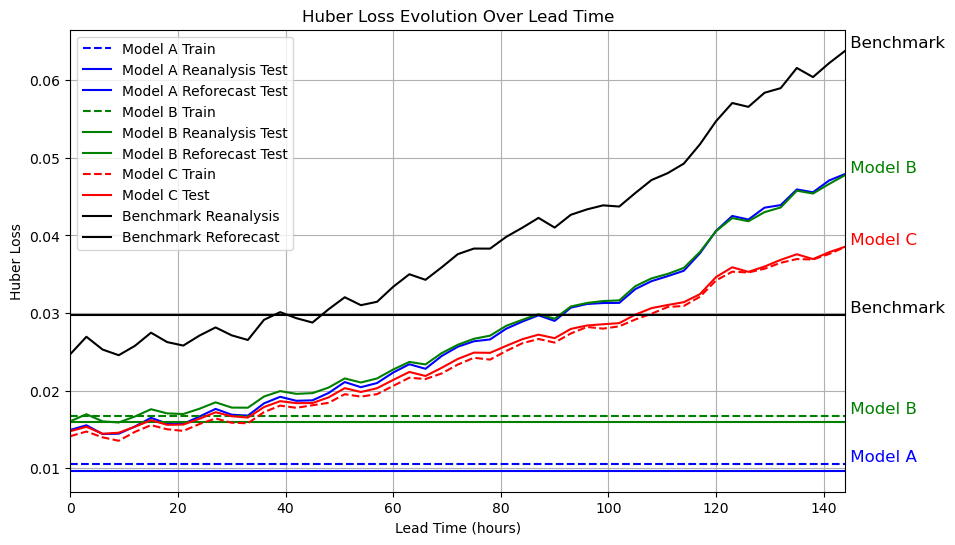

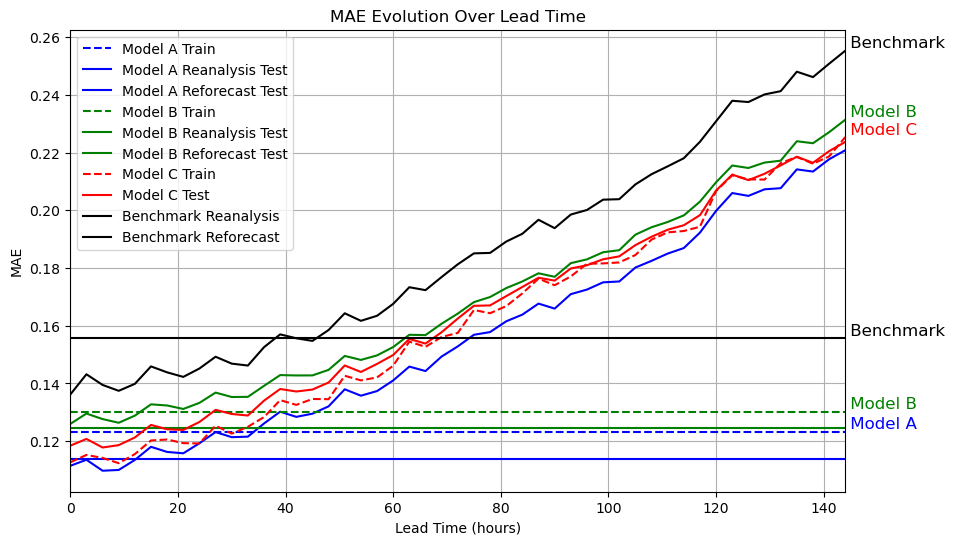

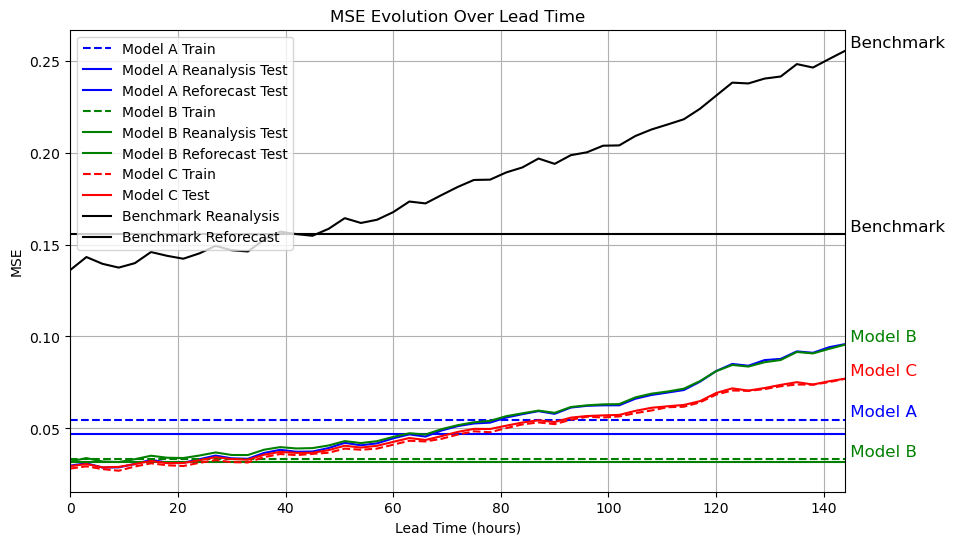

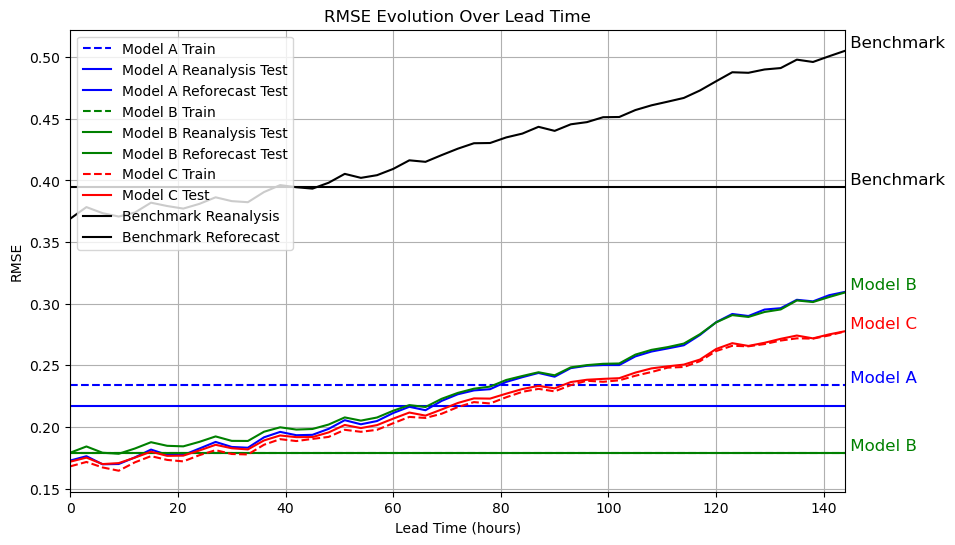

In [ ]:
import joblib
import matplotlib.pyplot as plt
import os

# Allow duplicate OpenMP instances (prevents crashes on some systems)
os.environ["KMP_DUPLICATE_LIB_OK"] = "TRUE"

# Model A
metrics_model_A_reanalysis = joblib.load("modelA/parameters1_standard/metrics.pkl")
# training
model_A_huber_train = metrics_model_A_reanalysis["Training"]["normalised"]["Huber"]
model_A_mae_train = metrics_model_A_reanalysis["Training"]["normalised"]["MAE"]
model_A_mse_train = metrics_model_A_reanalysis["Training"]["normalised"]["MSE"]
model_A_rmse_train = metrics_model_A_reanalysis["Training"]["normalised"]["RMSE"]
# tested on reanalysis data
model_A_reanalysis_huber_test = metrics_model_A_reanalysis["Testing"]["normalised"]["Huber"]
model_A_reanalysis_mae_test = metrics_model_A_reanalysis["Testing"]["normalised"]["MAE"]
model_A_reanalysis_mse_test = metrics_model_A_reanalysis["Testing"]["normalised"]["MSE"]
model_A_reanalysis_rmse_test = metrics_model_A_reanalysis["Testing"]["normalised"]["RMSE"]
# tested on reforecast data
metrics_model_A_reforecast = joblib.load("modelA/metrics_reforecast/metrics.pkl")
lead_times = sorted([key for key in metrics_model_A_reforecast.keys()])
model_A_reforecast_huber_test = [metrics_model_A_reforecast[lt]["normalised"]["Huber"] for lt in lead_times]
model_A_reforecast_mae_test = [metrics_model_A_reforecast[lt]["normalised"]["MAE"] for lt in lead_times]
model_A_reforecast_mse_test = [metrics_model_A_reforecast[lt]["normalised"]["MSE"] for lt in lead_times]
model_A_reforecast_rmse_test = [metrics_model_A_reforecast[lt]["normalised"]["RMSE"] for lt in lead_times]

# Model B
metrics_model_B_reanalysis = joblib.load("modelB/parameters/metrics.pkl")
# training
model_B_huber_train = metrics_model_B_reanalysis["Training"]["Huber"]
model_B_mae_train = metrics_model_B_reanalysis["Training"]["MAE"]
model_B_mse_train = metrics_model_B_reanalysis["Training"]["MSE"]
model_B_rmse_train = metrics_model_B_reanalysis["Training"]["RMSE"]
# tested on reanalysis data
model_B_reanalysis_huber_test = metrics_model_B_reanalysis["Testing"]["Huber"]
model_B_reanalysis_mae_test = metrics_model_B_reanalysis["Testing"]["MAE"]
model_B_reanalysis_mse_test = metrics_model_B_reanalysis["Testing"]["MSE"]
model_B_reanalysis_rmse_test = metrics_model_B_reanalysis["Testing"]["RMSE"]
# tested on reforecast data
metrics_model_B_reforecast = joblib.load("modelB/metrics_reforecast/metrics.pkl")
lead_times = sorted([key for key in metrics_model_B_reforecast.keys()])
model_B_reforecast_huber_test = [metrics_model_B_reforecast[lt]["Huber"] for lt in lead_times]
model_B_reforecast_mae_test = [metrics_model_B_reforecast[lt]["MAE"] for lt in lead_times]
model_B_reforecast_mse_test = [metrics_model_B_reforecast[lt]["MSE"] for lt in lead_times]
model_B_reforecast_rmse_test = [metrics_model_B_reforecast[lt]["RMSE"] for lt in lead_times]

# Model C (loaded from files)
metrics_model_C = joblib.load("modelC/parameters/metrics.pkl")
lead_times = sorted([key for key in metrics_model_C.keys()])
# training
model_C_huber_test = [metrics_model_C[lt]["Training"]["Huber"] for lt in lead_times]
model_C_mae_test = [metrics_model_C[lt]["Training"]["MAE"] for lt in lead_times]
model_C_mse_test = [metrics_model_C[lt]["Training"]["MSE"] for lt in lead_times]
model_C_rmse_test = [metrics_model_C[lt]["Training"]["RMSE"] for lt in lead_times]
# testing
model_C_huber_train = [metrics_model_C[lt]["Testing"]["Huber"] for lt in lead_times]
model_C_mae_train = [metrics_model_C[lt]["Testing"]["MAE"] for lt in lead_times]
model_C_mse_train = [metrics_model_C[lt]["Testing"]["MSE"] for lt in lead_times]
model_C_rmse_train = [metrics_model_C[lt]["Testing"]["RMSE"] for lt in lead_times]

# Benchmark values
# tested on reanalysis data
metrics_benchmark_reanalysis = joblib.load("Benchmark/metrics/metrics_reanalysis_2.pkl")
benchmark_reanalysis_huber = metrics_benchmark_reanalysis["Huber"]
benchmark_reanalysis_mae = metrics_benchmark_reanalysis["MAE"]
benchmark_reanalysis_mse = metrics_benchmark_reanalysis["MSE"]
benchmark_reanalysis_rmse = metrics_benchmark_reanalysis["RMSE"]
# tested on reforecast data
metrics_benchmark_reforecast = joblib.load("Benchmark/metrics/metrics_reforecast_2.pkl")
lead_times = sorted([key for key in metrics_benchmark_reforecast.keys()])
benchmark_reforecast_huber = [metrics_benchmark_reforecast[lt]["Huber"] for lt in lead_times]
benchmark_reforecast_mae = [metrics_benchmark_reforecast[lt]["MAE"] for lt in lead_times]
benchmark_reforecast_mse = [metrics_benchmark_reforecast[lt]["MSE"] for lt in lead_times]
benchmark_reforecast_rmse = [metrics_benchmark_reforecast[lt]["RMSE"] for lt in lead_times]


# Function for plotting loss evolution
def plot_loss_evolution(model_c_train, model_c_test, model_a_train, model_a_reanalysis_test, model_a_reforecast_test, model_b_train, model_b_reanalysis_test, model_b_reforecast_test, benchmark_reanalysis, benchmark_reforecast, ylabel, title):

    plt.figure(figsize=(10, 6))
    
    # Model A
    plt.axhline(y=model_a_train, color="blue", linestyle="dashed", label="Model A Train")
    plt.axhline(y=model_a_reanalysis_test, color="blue", linestyle="solid", label="Model A Reanalysis Test")
    plt.plot(lead_times, model_a_reforecast_test, color="blue", linestyle="solid", label="Model A Reforecast Test")

    # Model B
    plt.axhline(y=model_b_train, color="green", linestyle="dashed", label="Model B Train")
    plt.axhline(y=model_b_reanalysis_test, color="green", linestyle="solid", label="Model B Reanalysis Test")
    plt.plot(lead_times, model_b_reforecast_test, color="green", linestyle="solid", label="Model B Reforecast Test")

    # Model C (Train and Test)
    plt.plot(lead_times, model_c_train, color="red", linestyle="dashed", label="Model C Train")
    plt.plot(lead_times, model_c_test, color="red", linestyle="solid", label="Model C Test")

    # Benchmark
    plt.axhline(y=benchmark_reanalysis, color="black", linestyle="solid", label="Benchmark Reanalysis")
    plt.plot(lead_times, benchmark_reforecast, color="black", linestyle="solid", label="Benchmark Reforecast")

    # Add text labels near each line
    plt.text(lead_times[-1], model_a_train, " Model A", color="blue", fontsize=12, verticalalignment='bottom')
    plt.text(lead_times[-1], model_a_reforecast_test[-1], " Model A", color="blue", fontsize=12, verticalalignment='bottom')
    plt.text(lead_times[-1], model_b_train, " Model B", color="green", fontsize=12, verticalalignment='bottom')
    plt.text(lead_times[-1], model_b_reforecast_test[-1], " Model B", color="green", fontsize=12, verticalalignment='bottom')
    plt.text(lead_times[-1], model_c_train[-1], " Model C", color="red", fontsize=12, verticalalignment='bottom')
    plt.text(lead_times[-1], benchmark_reanalysis, " Benchmark", color="black", fontsize=12, verticalalignment='bottom')
    plt.text(lead_times[-1], benchmark_reforecast[-1], " Benchmark", color="black", fontsize=12, verticalalignment='bottom')

    # Add simplified legend for only "Train" and "Test" labels
    # plt.plot([], [], linestyle="dashed", color="black", label="Train")
    # plt.plot([], [], linestyle="solid", color="black", label="Test")
    plt.legend(loc="upper left") # remove labels and uncomment previous two lines to only show "Train" and "Test" in legend

    # Formatting
    plt.xlabel("Lead Time (hours)")
    plt.ylabel(ylabel)
    plt.xlim(0, 144)
    plt.title(title)
    plt.grid(True)
    plt.show()

# Plot Huber Loss
plot_loss_evolution(model_C_huber_train, model_C_huber_test, model_A_huber_train, model_A_reanalysis_huber_test, model_A_reforecast_huber_test,
                    model_B_huber_train, model_B_reanalysis_huber_test, model_B_reforecast_huber_test, benchmark_reanalysis_huber, benchmark_reforecast_huber,
                    "Huber Loss", "Huber Loss Evolution Over Lead Time")

# Plot MAE Loss
plot_loss_evolution(model_C_mae_train, model_C_mae_test, model_A_mae_train, model_A_reanalysis_mae_test, model_A_reforecast_mae_test,
                    model_B_mae_train, model_B_reanalysis_mae_test, model_B_reforecast_mae_test, benchmark_reanalysis_mae, benchmark_reforecast_mae,
                    "MAE", "MAE Evolution Over Lead Time")

# Plot MSE Loss
plot_loss_evolution(model_C_mse_train, model_C_mse_test, model_A_mse_train, model_A_reanalysis_mse_test, model_A_reforecast_mse_test,
                    model_B_mse_train, model_B_reanalysis_mse_test, model_B_reforecast_mse_test, benchmark_reanalysis_mse, benchmark_reforecast_mse,
                    "MSE", "MSE Evolution Over Lead Time")

# Plot RMSE Loss
plot_loss_evolution(model_C_rmse_train, model_C_rmse_test, model_A_rmse_train, model_A_reanalysis_rmse_test, model_A_reforecast_rmse_test,
                    model_B_rmse_train, model_B_reanalysis_rmse_test, model_B_reforecast_rmse_test, benchmark_reanalysis_rmse, benchmark_reforecast_rmse,
                    "RMSE", "RMSE Evolution Over Lead Time")